In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [4]:
zomato_data = pd.read_csv("zomato.csv")

In [5]:
zomato_data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [6]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

**DATA CLEANING**

In [7]:
column_drop = ['url','phone','menu_item','location','reviews_list']
zomato_data.drop(columns=column_drop,axis=1,inplace=True)

In [8]:
zomato_data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

**Finding and Droping Duplicates**

In [9]:
zomato_data.duplicated().sum()

85

In [10]:
zomato_data.drop_duplicates(inplace=True)

zomato_data.isna().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7764
votes                              0
rest_type                        227
dish_liked                     28037
cuisines                          45
approx_cost(for two people)      344
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

**Rename Columns**

In [11]:
zomato_data.rename(columns={'approx_cost(for two people)': 'average_cost', 'listed_in(type)': 'meal_type','listed_in(city)':'city'}, inplace=True)
zomato_data

,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,average_cost,meal_type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


In [12]:
zomato_data["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
zomato_data["rate"].isna().sum()

7764

**CLEANING RATE COLUMN**

In [14]:
def rest_rate(rates):
    if(rates=="NEW" or rates=="-"):
        return np.nan
    else:
        rate =float(str(rates).split("/")[0])
        return rate

In [15]:
zomato_data["rate"]=zomato_data["rate"].apply(rest_rate)

In [16]:
round_rate=lambda x:round(x,2)

In [17]:
zomato_data["rate"]
zomato_data["rate"]=zomato_data["rate"].apply(round_rate)
zomato_data["rate"]

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51632, dtype: float64

**INSIGHTS**

Text(0.5, 1.0, 'Probablity distribution of average_cost and booked tables')

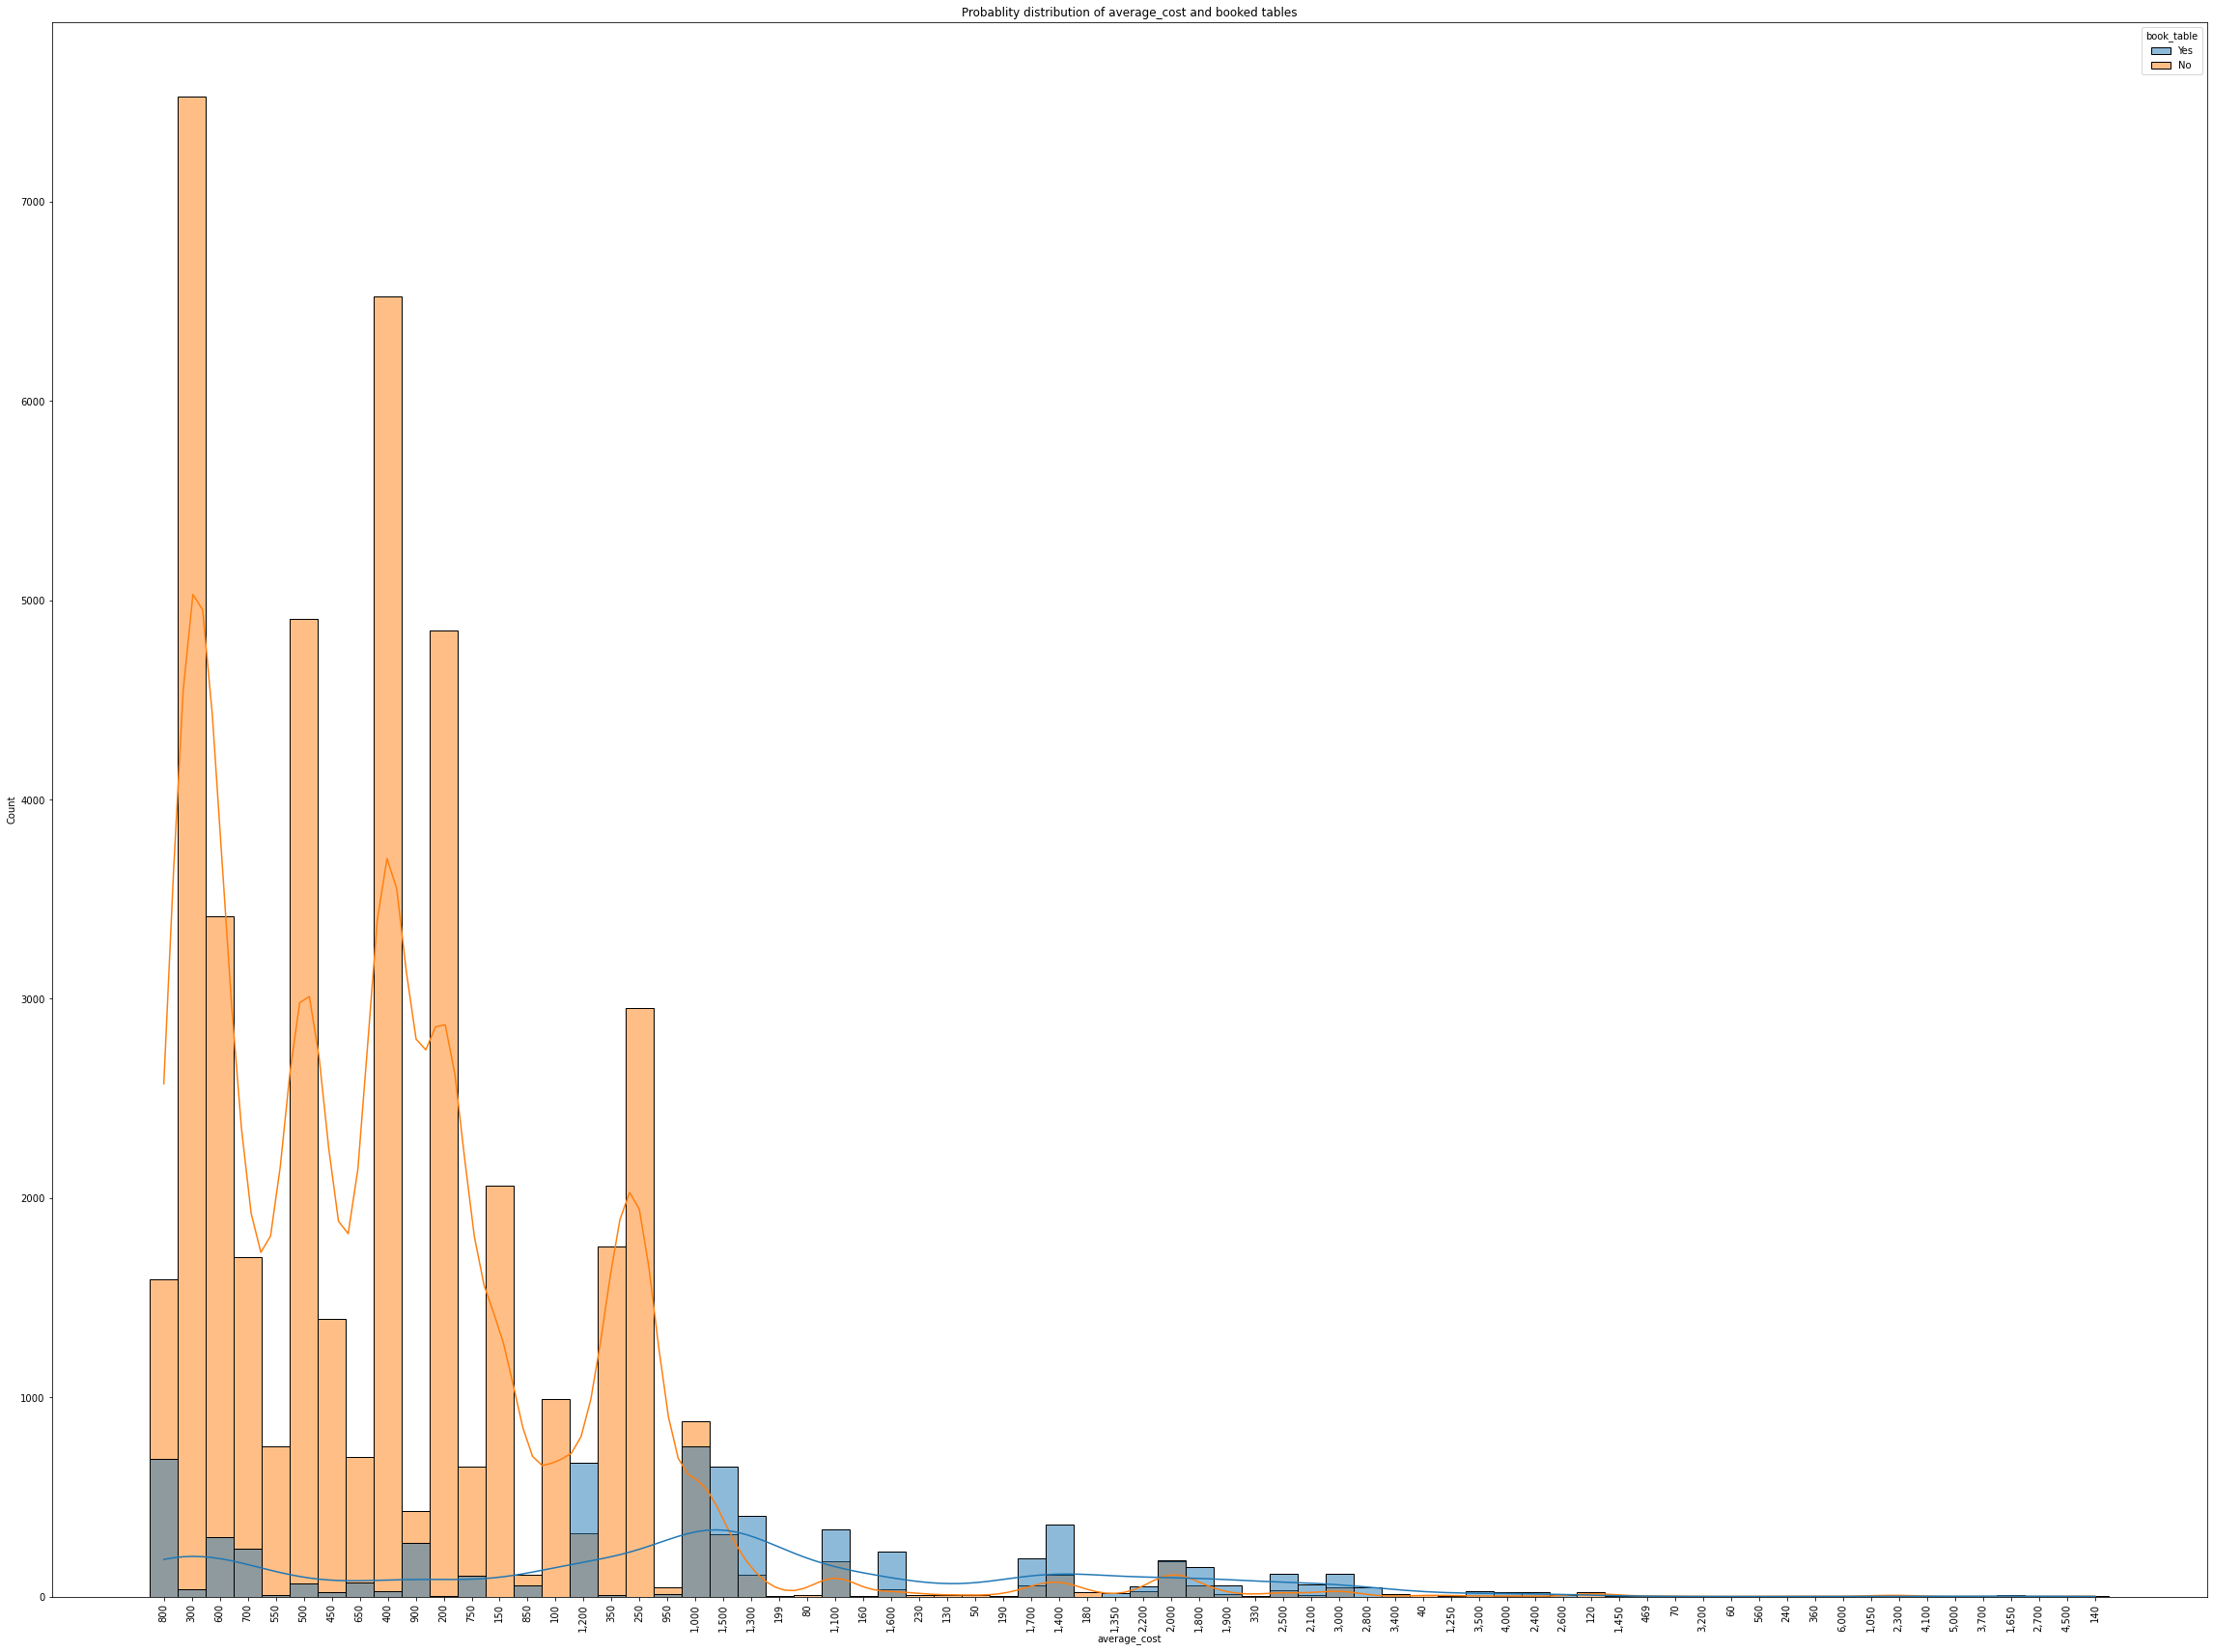

In [19]:
plt.figure(figsize=(40,30))
sns.histplot(zomato_data,x='average_cost',hue='book_table',kde=True,bins=3)
plt.xticks(rotation=89)
plt.title('Probablity distribution of average_cost and booked tables')

In [22]:
meal_types= zomato_data.groupby('meal_type').sum()

meal_types

,rate,votes
meal_type,,
Buffet,3396.4,885181
Cafes,5909.4,826857
Delivery,75273.1,5271380
Desserts,10318.8,541294
Dine-out,52260.4,5149345
Drinks & nightlife,4207.2,1250632
Pubs and bars,2565.5,695423


<Figure size 3600x3600 with 0 Axes>

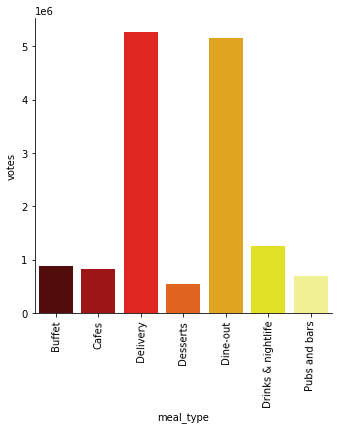

In [26]:
meal_types['meal_type'] = meal_types.index    

%matplotlib inline

fig=plt.figure(figsize=(50,50))
sns.catplot(x='meal_type', y='votes',data=meal_types,palette='hot',kind='bar')
plt.xticks(rotation=89)
plt.show()

In [29]:
cities = zomato_data.groupby('city').sum()

cities

,rate,votes
city,,
BTM,9645.7,978147
Banashankari,2669.4,151573
Bannerghatta Road,4327.5,244843
Basavanagudi,3974.2,281606
Bellandur,3501.9,345136
Brigade Road,5636.5,646419
Brookefield,4096.7,270959
Church Street,5707.9,671542
Electronic City,2885.9,109804


<Figure size 3600x3600 with 0 Axes>

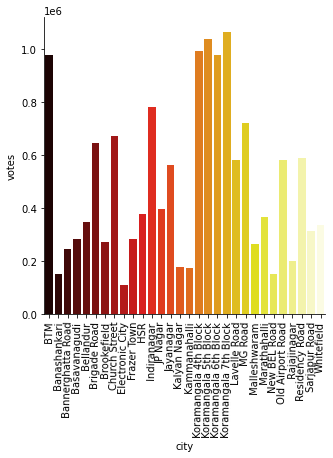

In [32]:
cities['city'] = cities.index    
%matplotlib inline

fig=plt.figure(figsize=(50,50))
sns.catplot(x='city', y='votes',data=cities,palette='hot',kind='bar')
plt.xticks(rotation=89)
plt.show()

Text(0.5, 1.0, 'Probablity distribution of average_cost and online trade')

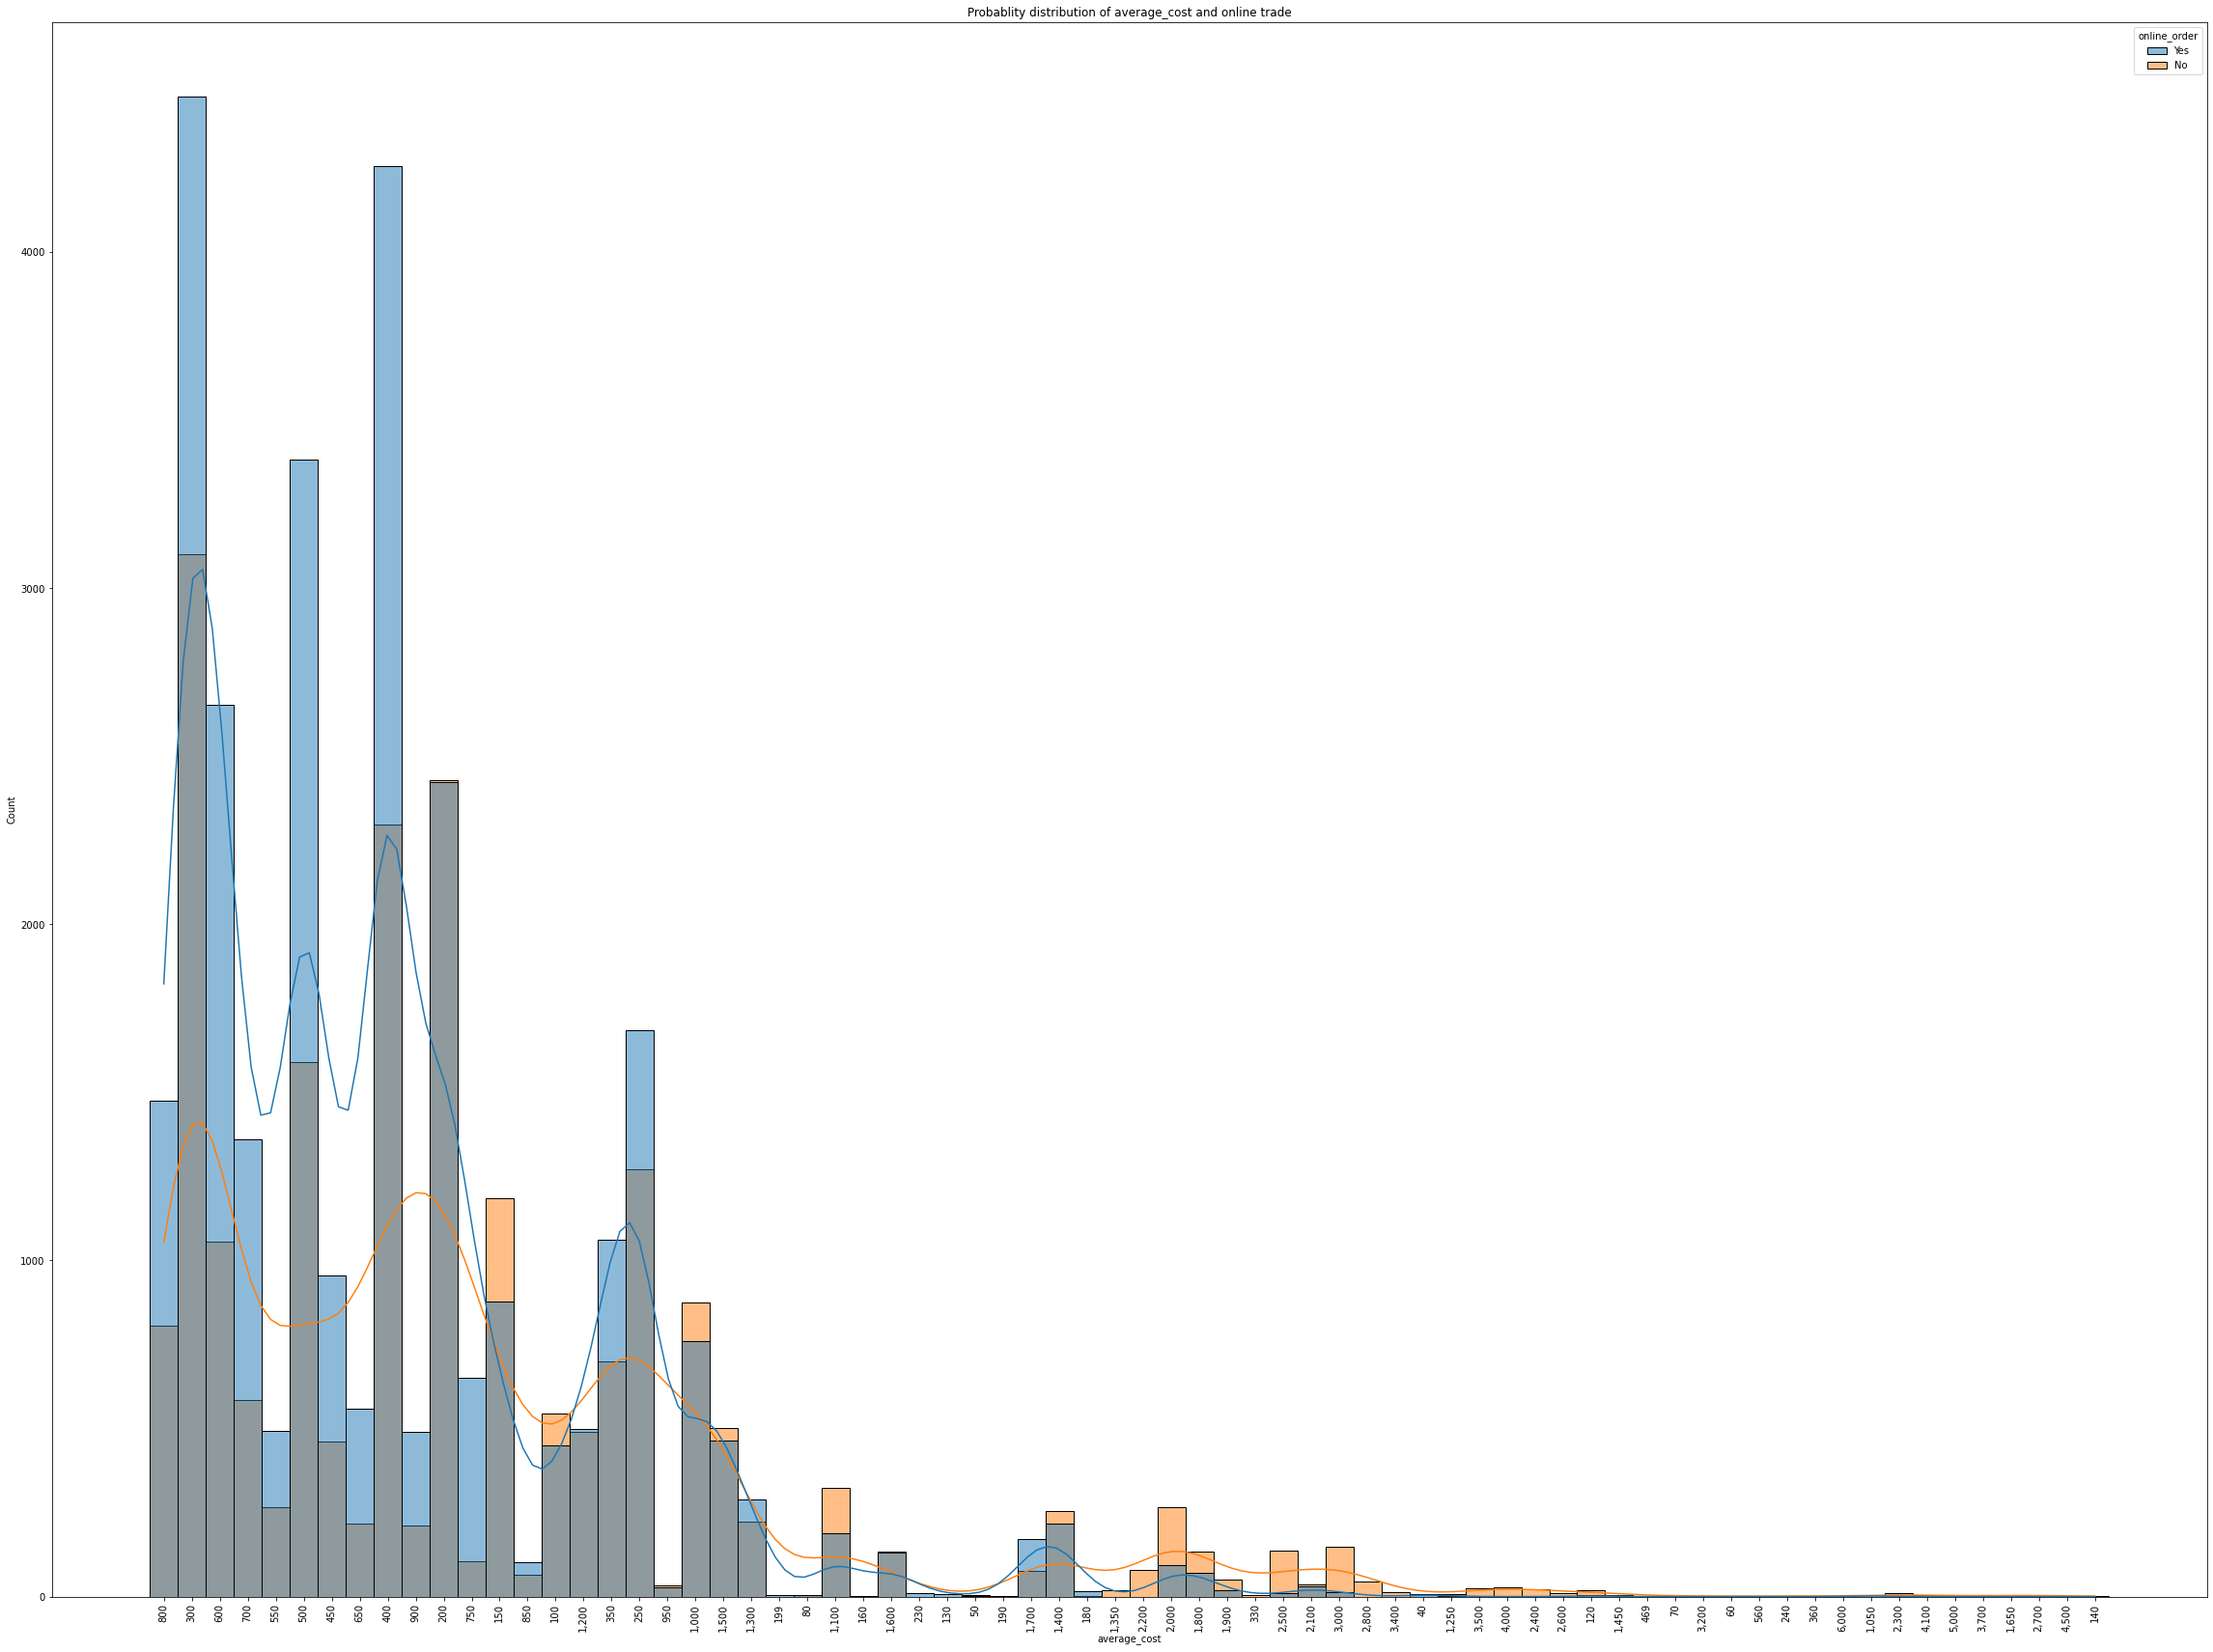

In [33]:
plt.figure(figsize=(40,30))
sns.histplot(zomato_data,x='average_cost',hue='online_order',kde=True,bins=3)
plt.xticks(rotation=89)
plt.title('Probablity distribution of average_cost and online trade')

In [34]:
meals = zomato_data.groupby('meal_type').sum()

meals

,rate,votes
meal_type,,
Buffet,3396.4,885181
Cafes,5909.4,826857
Delivery,75273.1,5271380
Desserts,10318.8,541294
Dine-out,52260.4,5149345
Drinks & nightlife,4207.2,1250632
Pubs and bars,2565.5,695423


<Figure size 3600x3600 with 0 Axes>

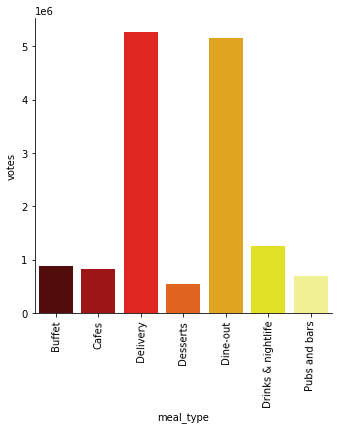

In [35]:
meals['meal_type'] = meals.index    

%matplotlib inline

fig=plt.figure(figsize=(50,50))
sns.catplot(x='meal_type', y='votes',data=meals,palette='hot',kind='bar')
plt.xticks(rotation=89)
plt.show()

In [37]:
votes= zomato_data.groupby("name")[["votes"]].mean().sort_values(by="votes",ascending=False).head(10).reset_index()

votes

,name,votes
0,Byg Brewski Brewing Company,16588.500000
1,Toit,14956.000000
2,The Black Pearl,9562.333333
3,Big Pitcher,9164.500000
4,Arbor Brewing Company,8396.545455
5,Prost Brew Pub,7860.900000
6,Church Street Social,7561.727273
7,Hoot,7257.000000
8,The Hole in the Wall Cafe,7124.875000
9,Truffles,7001.372093


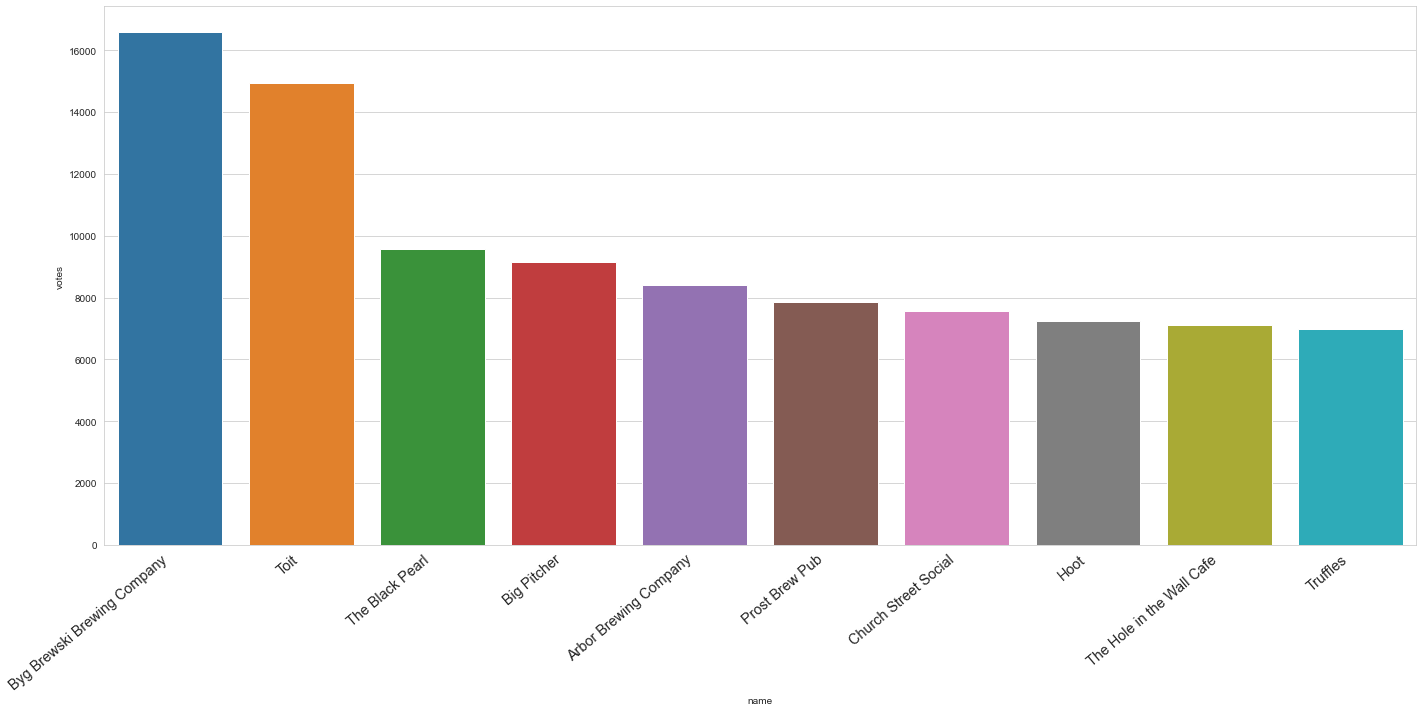

In [39]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="whitegrid")
sns.barplot(x="name",y="votes",data=votes)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()